In [1]:
#pip install pandas
import pandas as pd 
training = pd.read_excel (r'C:\Users\Yildiz\Repos\MATLAB\pythonexample.xlsx')
X = training.iloc[:,0:20]
y = training.iloc[:,-1]

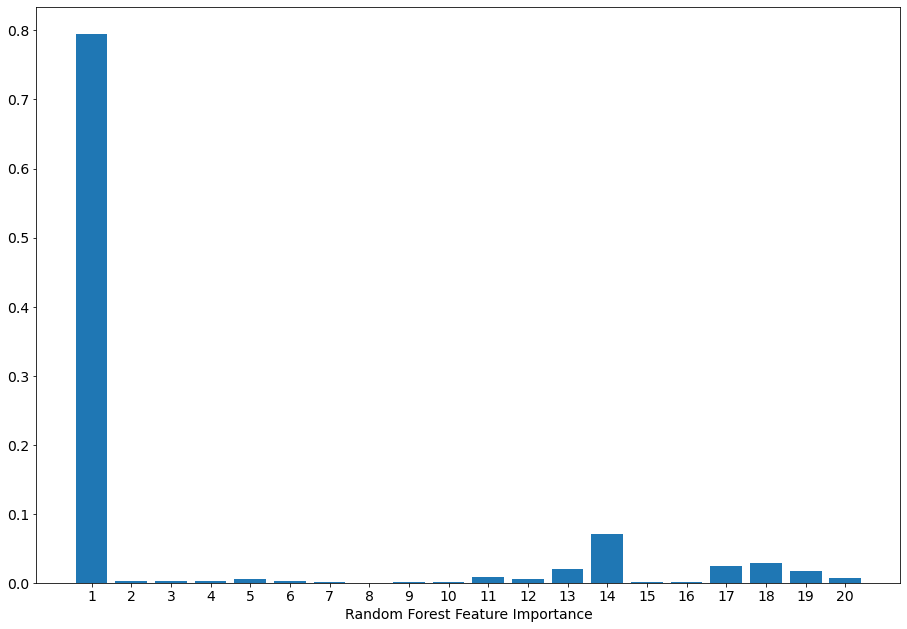

In [3]:
#Random Forest Built-in Feature Importance
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)

result = rf.feature_importances_

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Column = ['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']
ax.bar(Column,result)
plt.xlabel("Random Forest Feature Importance")
plt.show()

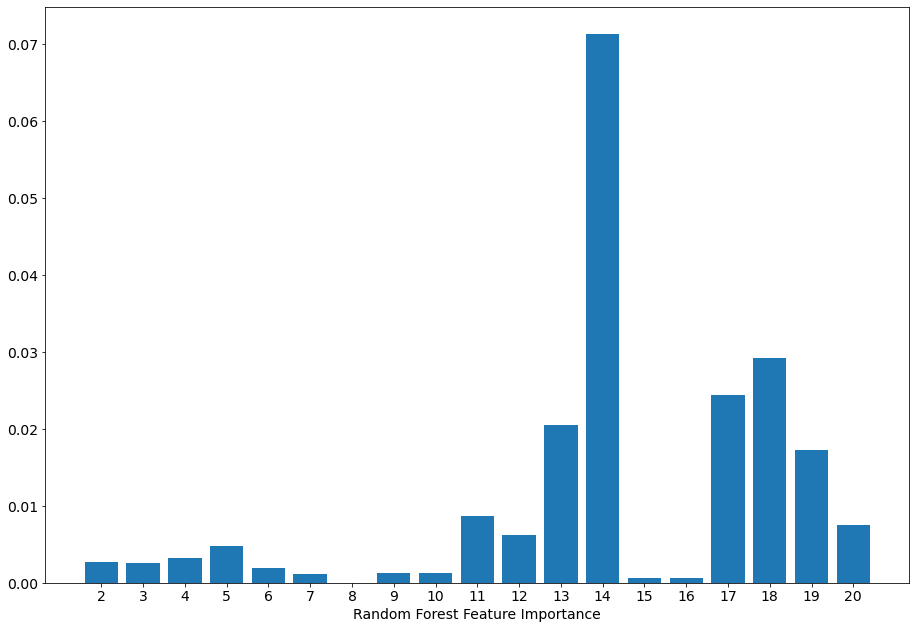

In [4]:
#without feature 1
result = rf.feature_importances_
result = result[1:20]
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Column = ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']
ax.bar(Column,result)
plt.xlabel("Random Forest Feature Importance")
plt.show()

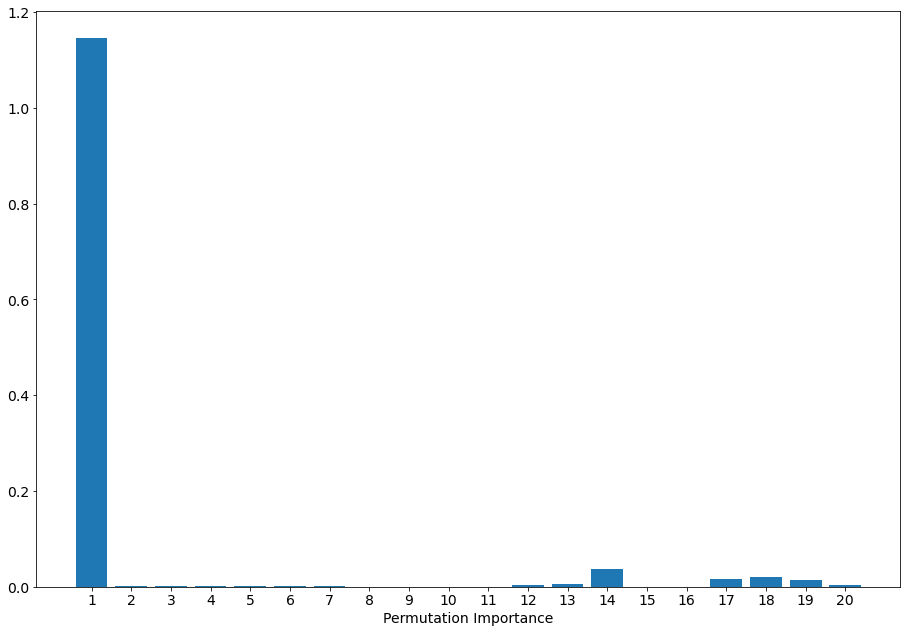

In [6]:
#Permutation Feature Importance
perm_importance = permutation_importance(rf, X, y)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Column = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']
ax.bar(Column,perm_importance.importances_mean)
plt.xlabel("Permutation Importance")
plt.show()

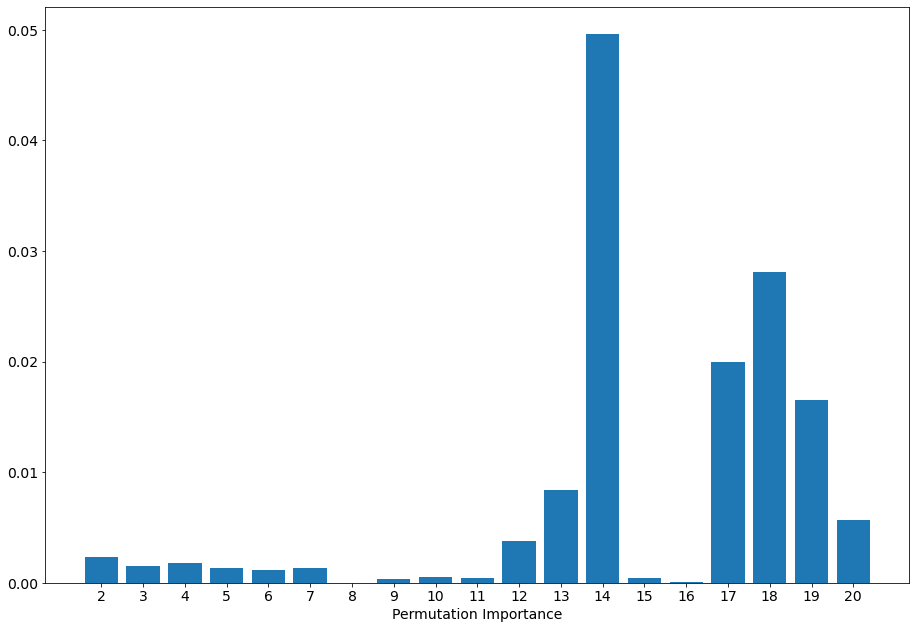

In [7]:
perm_importance = permutation_importance(rf, X, y)
perm_importance.importances_mean = perm_importance.importances_mean[1:20]
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Column = ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']
ax.bar(Column,perm_importance.importances_mean)
plt.xlabel("Permutation Importance")
plt.show()

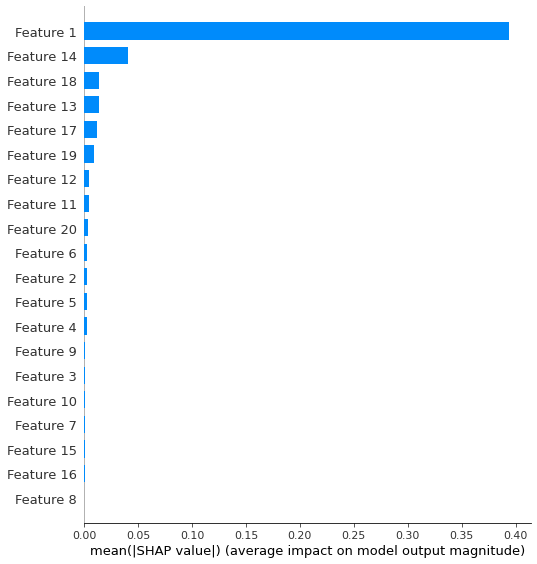

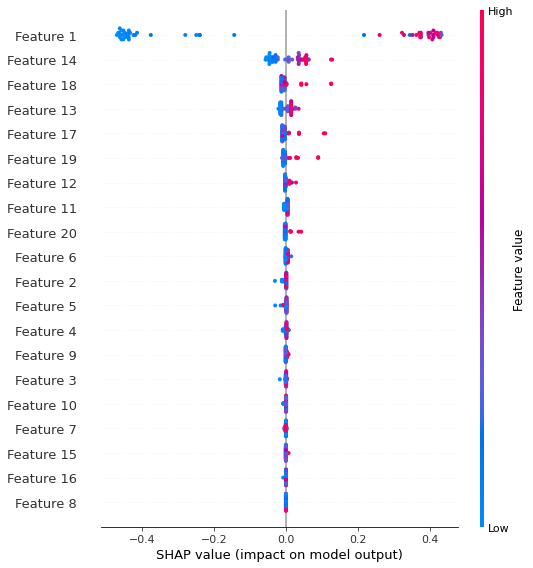

In [8]:
#SHapley Additive exPlanations (SHAP)
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")
shap.summary_plot(shap_values, X)

[0.17713709 0.00844077 0.08961594 0.09865526 0.01135327 0.07360611
 0.01264578 0.03053889 0.03243907 0.00906804 0.06688151 0.05594252
 0.11148842 0.07529906 0.01414364 0.02590028 0.02597674 0.02059155
 0.04308308 0.01719297]


<AxesSubplot:>

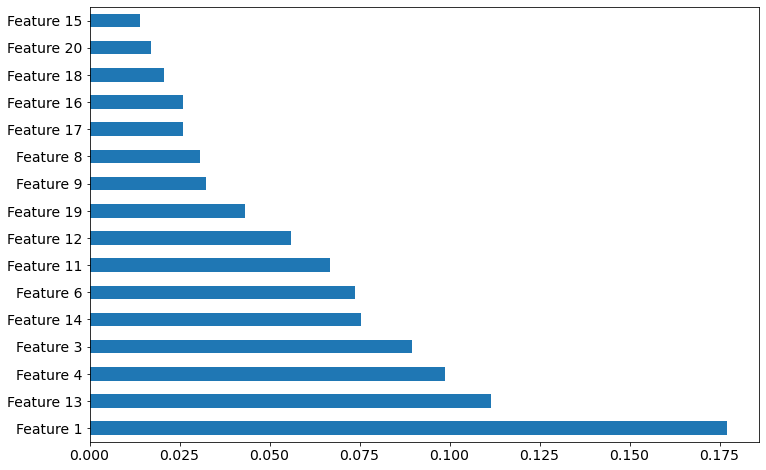

In [9]:
## ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plot

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class
feature_importances = pd.Series(model.feature_importances_,index=X.columns)
feature_importances.nlargest(16).plot(kind='barh')

<AxesSubplot:>

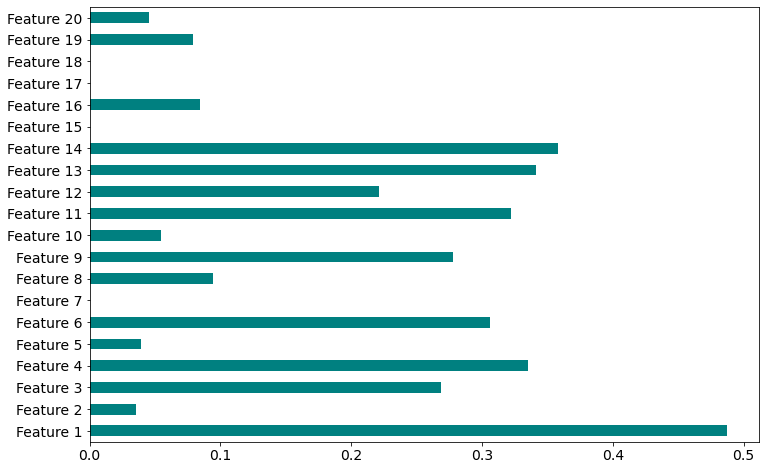

In [10]:
## Information Gain
import pandas as pd
dataframe = pd.read_excel (r'C:\Users\Yildiz\Repos\MATLAB\pythonexample.xlsx')
array = dataframe.values
X = array[:,0:20]
y = array[:,-1]

from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(X,y)
feat_importance = pd.Series(importance, dataframe.columns[0: len(dataframe.columns)-1])
feat_importance.plot(kind='barh', color='teal')

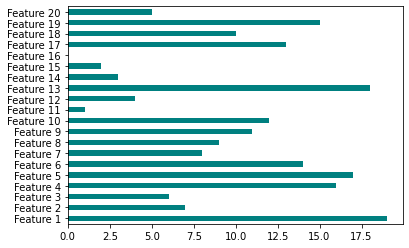

In [11]:
## Fisher's Score
#pip install skfeature-chappers
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
%matplotlib inline

#Calculating Scores
ranks = fisher_score.fisher_score(X,y)

#Plotting the ranks
feat_importance = pd.Series(ranks, dataframe.columns[0:len(dataframe.columns)-1])
feat_importance.plot(kind = 'barh', color = 'teal')
plt.show()

In [18]:
## Forward Feature Selection
training = pd.read_excel (r'C:\Users\Yildiz\Repos\MATLAB\pythonexample.xlsx')
X = training.iloc[:,0:20]
y = training.iloc[:,-1]
#pip install mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.feature_selection import SequentialFeatureSelector
import sklearn.linear_model as sk
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state = 42, n_jobs = -1, max_iter = 500)
lr.fit(X,y)
ffs = SequentialFeatureSelector(lr, k_features = 'best', forward = True, n_jobs = -1)
ffs.fit(X, y)
features = list(ffs.k_feature_names_)
features = list(map(str, features))
lr.fit(X[features], y) # X&Y should be x&y_train
y_pred = lr.predict(X[features]) # X should be x_train
print(features)

['Feature 1', 'Feature 14', 'Feature 19']


In [14]:
## Backward Feature Selection
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector

lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=42, n_jobs=-1)
lr.fit(X, y)
bfs = SequentialFeatureSelector(lr, k_features='best', forward = False, n_jobs=-1)
bfs.fit(X, y)
features = list(bfs.k_feature_names_)
features = list(map(str, features))
lr.fit(X[features], y) # X&Y should be x&y_train
y_pred = lr.predict(X[features]) # X should be x_train
print(features)

['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9', 'Feature 10', 'Feature 11', 'Feature 12', 'Feature 13', 'Feature 14', 'Feature 19']


[14:55:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.5685426  0.         0.         0.         0.         0.
 0.02438424 0.         0.         0.         0.0219565  0.05048775
 0.02760878 0.13953729 0.         0.         0.         0.16748278
 0.         0.        ]


<function matplotlib.pyplot.show(close=None, block=None)>

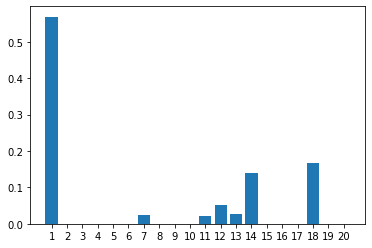

In [21]:
## XGBoost
Column = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

model = XGBClassifier()
model.fit(X,y)

#Feature Importance
print(model.feature_importances_)

#Plot
pyplot.bar(Column, model.feature_importances_)
pyplot.show


[14:55:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


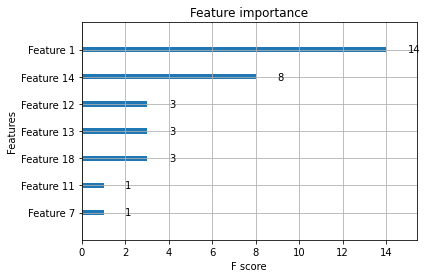

In [22]:
## Using the Built-in XGBoost Feature Importance Plot

from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

model = XGBClassifier()
model.fit(X,y)

plot_importance(model)
pyplot.show()